# 6.2 Boat Sales _Exploring Relationships

### This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships 
  ###  Correlations
   ### Scatterplots
  ###   Pair Plots
  ###   Categorical Plots

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scikitplot as skplt
import sklearn
import os


In [2]:
matplotlib.__version__ 

'3.7.1'

In [3]:
## Importing Data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [4]:
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.xlsx'), index_col = False)

In [5]:
df.shape

(9893, 13)

In [6]:
df.columns


Index(['Price', 'Boat Type', 'Manufacturer', 'Condition', 'Fuel ', 'Boat Age',
       'Year Built', 'Length', 'Width', 'Boat Area (m2)', 'Visits', 'Material',
       'Country'],
      dtype='object')

In [7]:
df.shape

(9893, 13)

In [8]:
df.head()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country
0,3537,Motor Yacht,Rigiflex power boats,Used,NaN,6,2017,4.00,1.90,7.60,226,Other,Switzerland
1,3490,Center console boat,Terhi power boats,Used,NaN,3,2020,4.00,1.50,6.00,75,Thermoplastic,Germany
2,3996,Sport Boat,Marine power boats,Used,NaN,2023,0,3.69,1.42,5.24,124,Aluminium,Switzerland
3,3367,Sport Boat,Pioner power boats,Used,NaN,3,2020,3.00,1.00,3.00,64,Other,Denmark
4,3399,Fishing Boat,Linder power boats,Used,NaN,4,2019,3.55,1.46,5.18,58,Aluminium,Germany


In [9]:
df.tail()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country
9888,5194,Sport Boat,Sea Ray power boats,Used,NaN,36,1987,6.30,2.44,15.37,1116,Other,Switzerland
9889,4516,Sport Boat,Other,New,NaN,2023,0,4.17,1.68,7.01,94,GRP,Germany
9890,4499,Sport Boat,BlueCraft power boats,New,NaN,3,2020,4.40,1.80,7.92,354,GRP,Germany
9891,4300,Pontoon Boat,Whaly power boats,Used,NaN,5,2018,4.37,1.89,8.26,266,Other,Italy
9892,4006,Fishing Boat,DarekCo power boats,New,NaN,4,2019,3.60,1.60,5.76,194,GRP,Switzerland


In [10]:
df.dtypes

Price               int64
Boat Type          object
Manufacturer       object
Condition          object
Fuel               object
Boat Age            int64
Year Built          int64
Length            float64
Width             float64
Boat Area (m2)    float64
Visits              int64
Material           object
Country            object
dtype: object

In [11]:
df["Visits"].astype(np.int64)

0        226
1         75
2        124
3         64
4         58
        ... 
9888    1116
9889      94
9890     354
9891     266
9892     194
Name: Visits, Length: 9893, dtype: int64

## Data Cleaning

In [12]:
# Checking for missing values
df.isnull().sum() 

Price                0
Boat Type            0
Manufacturer         0
Condition            0
Fuel              9808
Boat Age             0
Year Built           0
Length               0
Width                0
Boat Area (m2)       0
Visits               0
Material             0
Country              0
dtype: int64

#### No missing values 

In [13]:
# Checking for duplicates
df_dups = df[df.duplicated()]

In [14]:
df_dups

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country


#### No duplicates found

In [15]:
# Checking for Mixed-Type Data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

Fuel 


C:\Users\Mafalda\AppData\Local\Temp\ipykernel_7668\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_7668\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_7668\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_7668\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_7668\2690227181.py

#### No mixed-type columns found

# Exploring Relationships

## Correlations

In [16]:
# Creating a correlation matrix using pandas
# Dropping categorical variables
df_sub=df.drop(['Boat Type', 'Manufacturer','Year Built','Fuel ','Condition', 'Material', 'Country'], axis = 1)
 

In [17]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9893 non-null   int64  
 1   Boat Age        9893 non-null   int64  
 2   Length          9893 non-null   float64
 3   Width           9893 non-null   float64
 4   Boat Area (m2)  9893 non-null   float64
 5   Visits          9893 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 463.9 KB


In [18]:
df_sub.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6,4.00,1.90,7.60,226
1,3490,3,4.00,1.50,6.00,75
2,3996,2023,3.69,1.42,5.24,124
3,3367,3,3.00,1.00,3.00,64
4,3399,4,3.55,1.46,5.18,58


In [19]:
df_sub.describe()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
count,9.893000e+03,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,3.032715e+05,129.807237,11.570017,3.520123,47.085896,149.177297
std,9.710542e+05,460.085261,5.998570,1.216765,46.945219,151.774013
min,0.000000e+00,2.000000,1.040000,0.010000,0.130000,13.000000
25%,4.300000e+04,6.000000,7.470000,2.550000,18.920000,70.000000
50%,9.400000e+04,16.000000,10.300000,3.350000,34.260000,108.000000
75%,2.490000e+05,27.000000,13.920000,4.250000,58.940000,172.000000
max,3.100000e+07,2023.000000,100.000000,25.160000,1078.800000,3263.000000


In [20]:
# Creating the correlation matix 
df_sub.corr()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
Price,1.000000,-0.009736,0.562629,0.517336,0.639042,-0.008014
Boat Age,-0.009736,1.000000,-0.117287,-0.127020,-0.090451,-0.024837
Length,0.562629,-0.117287,1.000000,0.871131,0.949638,-0.134986
Width,0.517336,-0.127020,0.871131,1.000000,0.879706,-0.157318
Boat Area (m2),0.639042,-0.090451,0.949638,0.879706,1.000000,-0.103592
Visits,-0.008014,-0.024837,-0.134986,-0.157318,-0.103592,1.000000


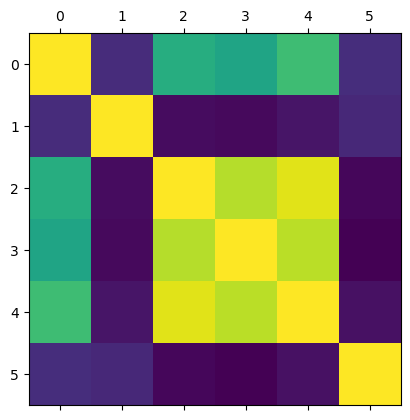

In [21]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

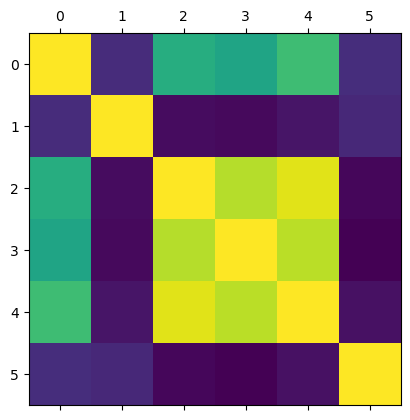

In [22]:
# Save figure
plt.matshow(df_sub.corr())
plt.savefig("out.png") 


In [23]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Mafalda\\Documents\\mafalda\\Formação\\Data Analytics\\CareerFoundry\\Data Analytics Program\\2.Data Immersion\\Achievement 6\\Boat Sales Analysis\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

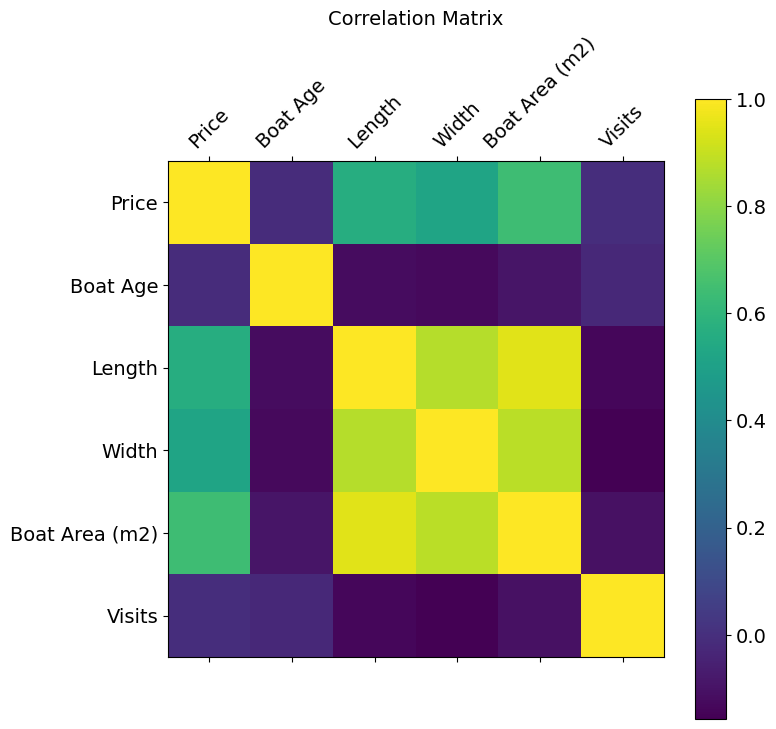

In [24]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

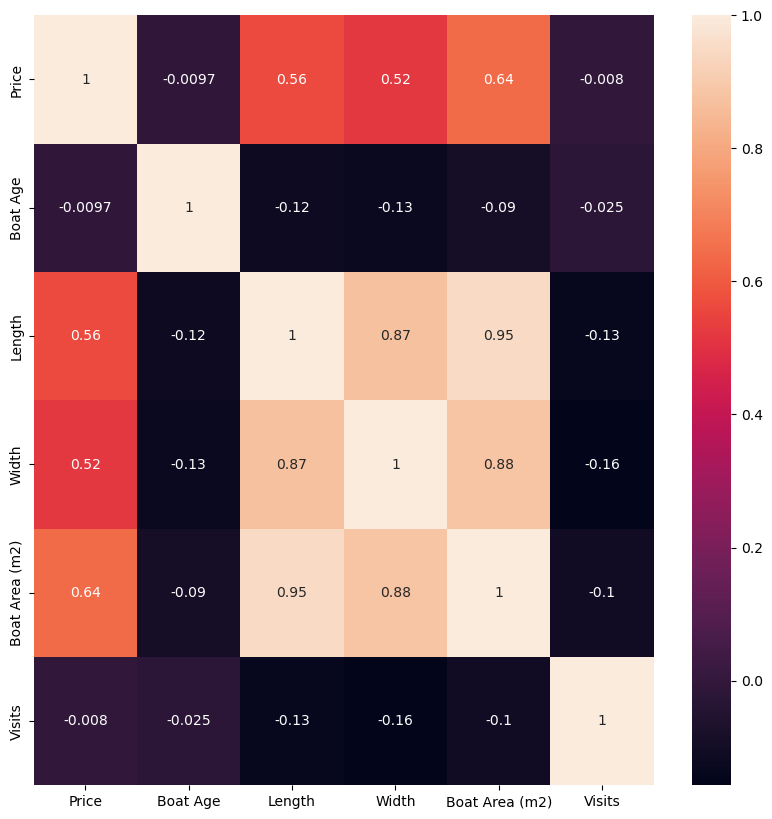

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.b

## Answer Q3

### Analyzing the heatmap we can see the following results:
### - The Price variable has a strong positive relationship with the variables Boat  Area (0.64), Width (0.52) and Length (0.56), and no relationship with the variable Visits (0) 
### - The Boat Age variable has a weak positive relationship with the Width (0.13) and Length (0.12), and no relationship with the variable Visits (0) 
###  - The Boat Area variables has a strong positive relationship with the variables Price (0.64), Width (0.88) and Length (0.95), and no relationship with the variable Visits (0) 
### - The variable Visits has no relationship with any of the other variables



## Scatterplots

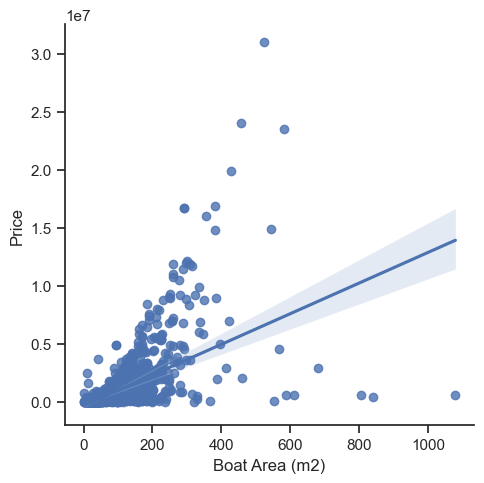

In [84]:
# Create a scatterplot for the "Boat Area" and "price " columns in seaborn
s1=sns.lmplot(x = 'Boat Area (m2)', y = 'Price', data = df_sub)
plt.show()

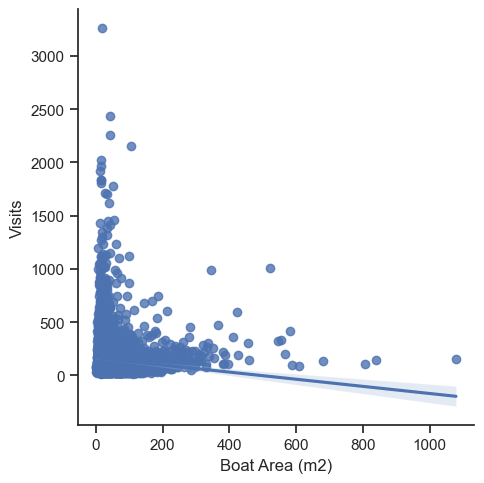

In [85]:
# Create a scatterplot for the "Boat Area" and "Visits " columns in seaborn
s2=sns.lmplot(x = 'Boat Area (m2)', y = 'Visits', data = df_sub)
plt.show()

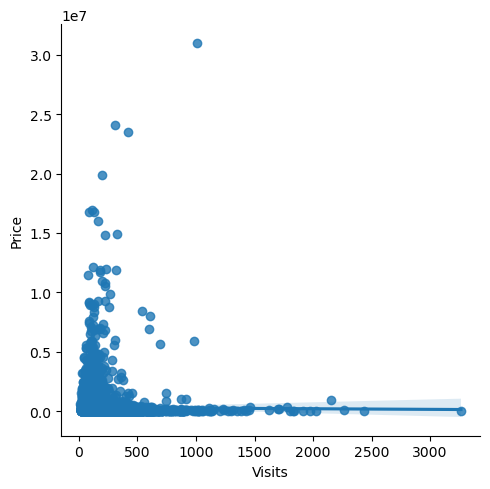

In [28]:
# Create a scatterplot for the "Visits" and "Price " columns in seaborn
sns.lmplot(x = 'Visits', y = 'Price', data = df_sub)
plt.show()

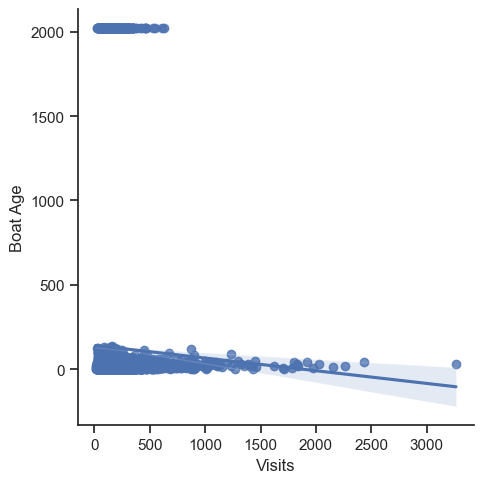

In [86]:
# Create a scatterplot for the "Visits" and "Boat Age " columns in seaborn
s3=sns.lmplot(x = 'Visits', y = 'Boat Age', data = df_sub)
plt.show()

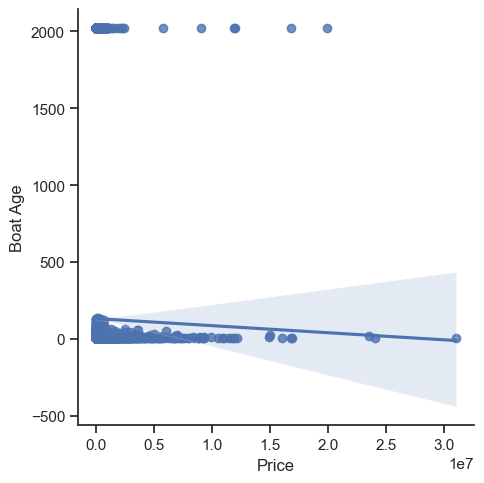

In [87]:
# Create a scatterplot for the "Boat Age" and "Price " columns in seaborn
s4=sns.lmplot(x = 'Price', y = 'Boat Age', data = df_sub)
plt.show()

## Answer Q4

### The plots confirm the information presented on the heatmap.

## Pair Plots

In [31]:
# Keeping only the variables we want to use in the pair plot

df_sub1=df_sub[['Price', 'Visits', 'Boat Area (m2)', 'Boat Age']]

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

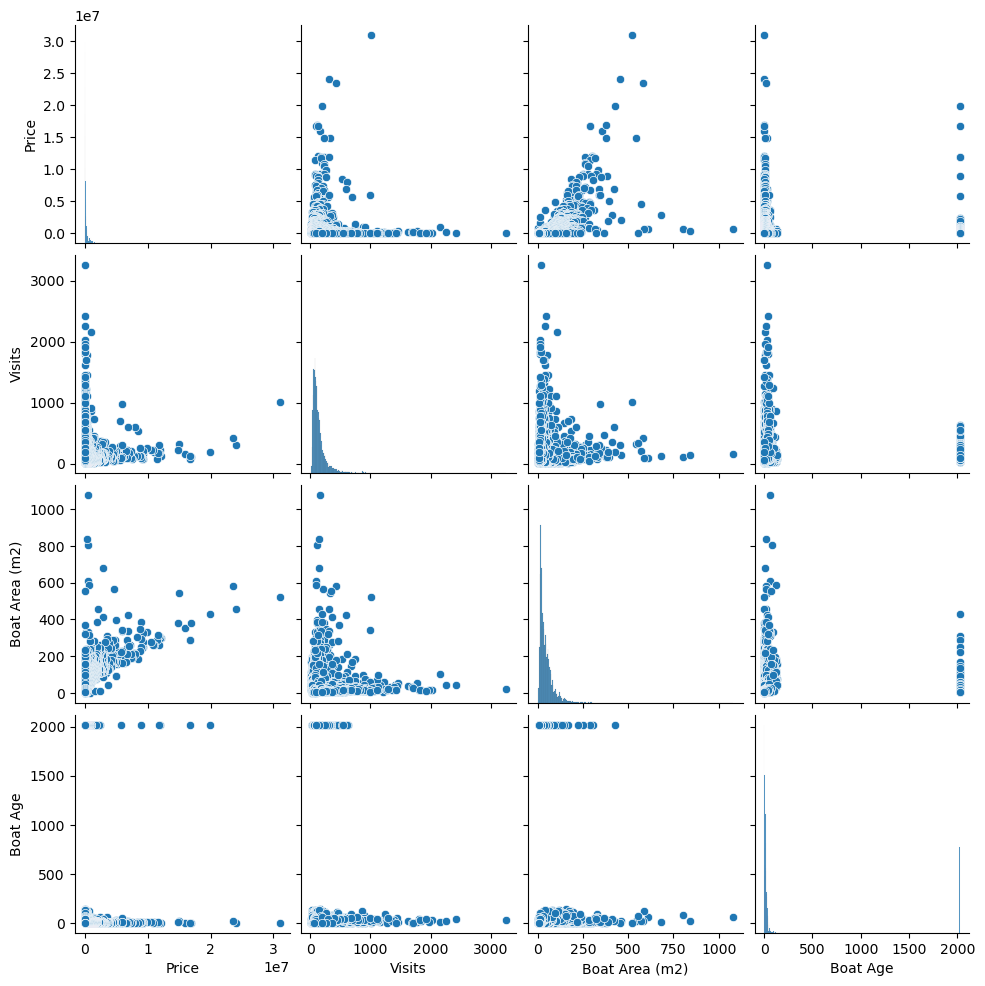

In [32]:
# Creating a pair plot 
g = sns.pairplot(df_sub1)


## Answer Q5
### I believe it´s worth exploring the relationship beetween Price/Boat Area, and since there is no other correlation found beetween numerical categories, then try explore the relatioships beeween the categorical ones


## Categorical Plots


In [33]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Condition', 'Fuel ', 'Boat Age',
       'Year Built', 'Length', 'Width', 'Boat Area (m2)', 'Visits', 'Material',
       'Country'],
      dtype='object')

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9893 non-null   int64  
 1   Boat Type       9893 non-null   object 
 2   Manufacturer    9893 non-null   object 
 3   Condition       9893 non-null   object 
 4   Fuel            85 non-null     object 
 5   Boat Age        9893 non-null   int64  
 6   Year Built      9893 non-null   int64  
 7   Length          9893 non-null   float64
 8   Width           9893 non-null   float64
 9   Boat Area (m2)  9893 non-null   float64
 10  Visits          9893 non-null   int64  
 11  Material        9893 non-null   object 
 12  Country         9893 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1004.9+ KB


In [35]:
df_sub



,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6,4.00,1.90,7.60,226
1,3490,3,4.00,1.50,6.00,75
2,3996,2023,3.69,1.42,5.24,124
3,3367,3,3.00,1.00,3.00,64
4,3399,4,3.55,1.46,5.18,58
...,...,...,...,...,...,...
9888,5194,36,6.30,2.44,15.37,1116
9889,4516,2023,4.17,1.68,7.01,94
9890,4499,3,4.40,1.80,7.92,354
9891,4300,5,4.37,1.89,8.26,266


C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


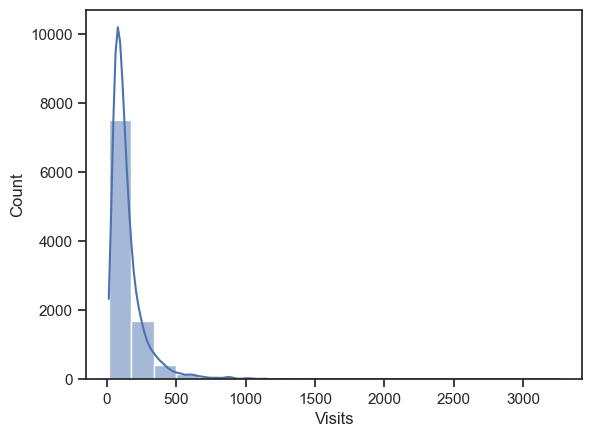

In [88]:
# Creating a Visits histogram
h1=sns.histplot(df['Visits'], bins = 20, kde = True)

In [37]:
# Creating a duplicate Visits column
df['Visits_categorical'] = df.loc[:, 'Visits']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               9893 non-null   int64  
 1   Boat Type           9893 non-null   object 
 2   Manufacturer        9893 non-null   object 
 3   Condition           9893 non-null   object 
 4   Fuel                85 non-null     object 
 5   Boat Age            9893 non-null   int64  
 6   Year Built          9893 non-null   int64  
 7   Length              9893 non-null   float64
 8   Width               9893 non-null   float64
 9   Boat Area (m2)      9893 non-null   float64
 10  Visits              9893 non-null   int64  
 11  Material            9893 non-null   object 
 12  Country             9893 non-null   object 
 13  Visits_categorical  9893 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [39]:
# Changing Visit_categorical dtype form int to str
df['Visits_categorical'].astype(str)

0        226
1         75
2        124
3         64
4         58
        ... 
9888    1116
9889      94
9890     354
9891     266
9892     194
Name: Visits_categorical, Length: 9893, dtype: object

In [40]:
df.dtypes

Price                   int64
Boat Type              object
Manufacturer           object
Condition              object
Fuel                   object
Boat Age                int64
Year Built              int64
Length                float64
Width                 float64
Boat Area (m2)        float64
Visits                  int64
Material               object
Country                object
Visits_categorical      int64
dtype: object

In [41]:
# Defining categories
df['Visits_categorical']=pd.cut(df['Visits'],
bins=[df['Visits'].min()-1, 200, 500, df['Visits'].max()+1],
labels= ['Low','Medium', 'High'])


In [42]:
df.head()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country,Visits_categorical
0,3537,Motor Yacht,Rigiflex power boats,Used,NaN,6,2017,4.00,1.90,7.60,226,Other,Switzerland,Medium
1,3490,Center console boat,Terhi power boats,Used,NaN,3,2020,4.00,1.50,6.00,75,Thermoplastic,Germany,Low
2,3996,Sport Boat,Marine power boats,Used,NaN,2023,0,3.69,1.42,5.24,124,Aluminium,Switzerland,Low
3,3367,Sport Boat,Pioner power boats,Used,NaN,3,2020,3.00,1.00,3.00,64,Other,Denmark,Low
4,3399,Fishing Boat,Linder power boats,Used,NaN,4,2019,3.55,1.46,5.18,58,Aluminium,Germany,Low


C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

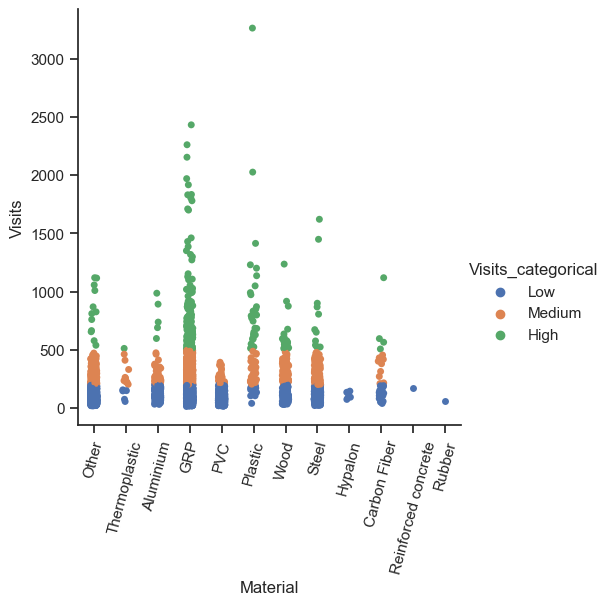

In [54]:
# Relationship of type of Material and Visits_categorical

sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'Material', y = 'Visits', hue= 'Visits_categorical', 
                    data=df)
plt.xticks(rotation = 75)
plt.show()

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

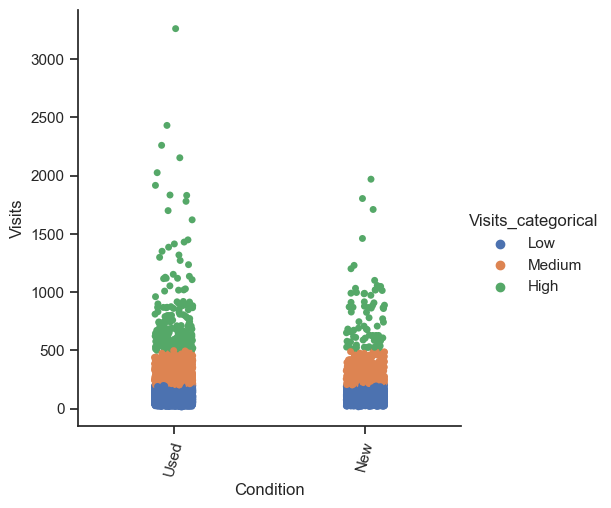

In [76]:
# Relationship of type of Condition and Visits_categorical
sns.set(style = "ticks")
cat_2 = sns.catplot(x = 'Condition', y = 'Visits', hue= 'Visits_categorical', 
                    data=df)
plt.xticks(rotation = 75)
plt.show()


In [96]:
# Exporting plots
s1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 's1.png'))
s2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 's2.png'))
s3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 's3.png'))
s4.savefig(os.path.join(path, '04 Analbysis', 'Visualizations', 's4.png'))
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplots.png'))
cat_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat1.png'))
cat_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat2.png'))


In [99]:
# Exporting data
df.to_csv(os.path.join(path, '02 Data','Prepared Data','boat_data_categories.csv'))

## Answer Q6
### As shown by the plots, we can see that the most modern material boat types are the most popular, and that in terms of condition, the used boats are more viewed then new ones.

## Answer Q7

### From this analysis we know that the max and min number of visits are 3263 and 13; the max and min price values (€) are 31 million and 0; that viewers prefer used boats  to new boats and that GRP is the most popular material and rubber the least one.

### From the analysis performed i believe it would important to investigate further any relationship beetween Boat Age/ Price and Visits.

## Answer Q8
### Possible Hypotheses:
### - The price value increases with the boat area;
### - The price value does not influence the number of Visits
### - The Boat Age does not influence the number of Visits
### - The most viewed boat material is GRP

